# CreditOne

### Selecting and Dividing Data

#### Import Modules

In [7]:
# imports

# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE



# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# cross validation
#from sklearn.cross_validation import train_test_split  # cross_validation deprecated
from sklearn.model_selection import train_test_split

# Ignore Future Warnings (FutureWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#### Data Structure

In [8]:
# data

credit = pd.read_csv('default of credit card clients.csv', header=1)
credit.head()


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [9]:
# Examine structure of the data 

credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [10]:
# Checking for NULL Values

if credit is None:
    print('There are null values')
else:
    print('There are no null values')


There are no null values


In [11]:
# Listing attributes of rawData dataframe

np.transpose(credit)

0       1      2      3      4      5       6      \
ID                              1       2      3      4      5      6       7   
LIMIT_BAL                   20000  120000  90000  50000  50000  50000  500000   
SEX                             2       2      2      2      1      1       1   
EDUCATION                       2       2      2      2      2      1       1   
MARRIAGE                        1       2      2      1      1      2       2   
AGE                            24      26     34     37     57     37      29   
PAY_0                           2      -1      0      0     -1      0       0   
PAY_2                           2       2      0      0      0      0       0   
PAY_3                          -1       0      0      0     -1      0       0   
PAY_4                          -1       0      0      0      0      0       0   
PAY_5                          -2       0      0      0      0      0       0   
PAY_6                          -2       2      0      0      0      0       0   
BILL_AMT1                    3913    2682  29239  46990   8617  64400  367965   
BILL_AMT2                    3102    1725  14027  48233   5670  57069  412023   
BILL_AMT3                     689    2682  13559  49291  35835  57608  445007   
BILL_AMT4                       0    3272  14331  28314  20940  19394  542653   
BILL_AMT5                       0    3455  14948  28959  19146  19619  483003   
BILL_AMT6                       0    3261  15549  29547  19131  20024  473944   
PAY_AMT1                        0       0   1518   2000   2000   2500   55000   
PAY_AMT2                      689    1000   1500   2019  36681   1815   40000   
PAY_AMT3                        0    1000   1000   1200  10000    657   38000   
PAY_AMT4                        0    1000   1000   1100   9000   1000   20239   
PAY_AMT5                        0       0   1000   1069    689   1000   13750   
PAY_AMT6                        0    2000   5000   1000    679    800   13770   
default payment next month      1       1      0      0      0      0       0   

                             7       8      9      ...   29990   29991  29992  \
ID                               8       9     10  ...   29991   29992  29993   
LIMIT_BAL                   100000  140000  20000  ...  140000  210000  10000   
SEX                              2       2      1  ...       1       1      1   
EDUCATION                        2       3      3  ...       2       2      3   
MARRIAGE                         2       1      2  ...       1       1      1   
AGE                             23      28     35  ...      41      34     43   
PAY_0                            0       0     -2  ...       0       3      0   
PAY_2                           -1       0     -2  ...       0       2      0   
PAY_3                           -1       2     -2  ...       0       2      0   
PAY_4                            0       0     -2  ...       0       2     -2   
PAY_5                            0       0     -1  ...       0       2     -2   
PAY_6                           -1       0     -1  ...       0       2     -2   
BILL_AMT1                    11876   11285      0  ...  138325    2500   8802   
BILL_AMT2                      380   14096      0  ...  137142    2500  10400   
BILL_AMT3                      601   12108      0  ...  139110    2500      0   
BILL_AMT4                      221   12211      0  ...  138262    2500      0   
BILL_AMT5                     -159   11793  13007  ...   49675    2500      0   
BILL_AMT6                      567    3719  13912  ...   46121    2500      0   
PAY_AMT1                       380    3329      0  ...    6000       0   2000   
PAY_AMT2                       601       0      0  ...    7000       0      0   
PAY_AMT3                         0     432      0  ...    4228       0      0   
PAY_AMT4                       581    1000  13007  ...    1505       0      0   
PAY_AMT5                      1687    1000   1122  ...    

#### Cleaning and Pre-processing

In [12]:
# Removing the ID column

del credit['ID']
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [13]:
# Check unique values for categorical variables

print('Unique Values')
print('SEX ' + str(sorted(credit['SEX'].unique())))
print('EDUCATION ' + str(sorted(credit['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(credit['MARRIAGE'].unique())))
print('PAY_0 ' + str(sorted(credit['PAY_0'].unique())))
print('PAY_2 ' + str(sorted(credit['PAY_2'].unique())))
print('PAY_3 ' + str(sorted(credit['PAY_3'].unique())))
print('PAY_4 ' + str(sorted(credit['PAY_4'].unique())))
print('PAY_5 ' + str(sorted(credit['PAY_5'].unique())))
print('PAY_6 ' + str(sorted(credit['PAY_6'].unique())))
print('default.payment.next.month ' + str(sorted(credit['default payment next month'].unique())))


Unique Values
SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]
PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
default.payment.next.month [0, 1]


In [14]:
# Convert/Group values for Education - Assign value of '4' to the records with values 0, 5, 6 for EDUCATION
# Values for “Others” in Education attribute are: 0, 4, 5, 6 (not well defined)

# Check for records with values 0, 5 or 6 for EDUCATION attribute

others = (credit.EDUCATION == 0) | (credit.EDUCATION == 5) | (credit.EDUCATION == 6)
credit.loc[others, 'EDUCATION']

47       5
69       5
385      5
502      6
504      6
        ..
29811    5
29836    6
29839    5
29920    5
29966    5
Name: EDUCATION, Length: 345, dtype: int64

In [15]:
# Assign value of '4' to the records with values 0, 5, 6 for EDUCATION

others = (credit.EDUCATION == 0) | (credit.EDUCATION == 5) | (credit.EDUCATION == 6)
credit.loc[others, 'EDUCATION'] = 4


In [16]:
# Verify values for EDUCATION have been converted to 4, no values 0, 5 or 6 for EDUCATION attribute

others = (credit.EDUCATION == 0) | (credit.EDUCATION == 5) | (credit.EDUCATION == 6)
credit.loc[others, 'EDUCATION']


Series([], Name: EDUCATION, dtype: int64)

In [17]:
# Verify value of '4' for 'others' in EDUCATION attribute

others4 = (credit.EDUCATION == 4)
credit.loc[others4, 'EDUCATION']


47       4
69       4
358      4
385      4
448      4
        ..
29836    4
29839    4
29847    4
29920    4
29966    4
Name: EDUCATION, Length: 468, dtype: int64

In [18]:
# Print unique values for EDUCATION

print('EDUCATION: ' + str(sorted(credit['EDUCATION'].unique())))


EDUCATION: [1, 2, 3, 4]


In [19]:
# Rename column "PAY_0" to "PAY_1" to match corresponding fields:
# i.e ("PAY_2", "PAY_3"....."PAY_6") or ("BILL_AMT1" and "PAY_AMT1")  

credit = credit.rename(columns={"PAY_0": "PAY_1"}) 


In [20]:
# Rename column "default payment next month" to a shorter meaningful name of "DEFAULT"

credit = credit.rename(columns={"default payment next month": "DEFAULT"}) 


In [21]:
# Verify the name of the columns have been changed

list(credit.columns.values)


['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DEFAULT']

We are interested in DEFAULT payment. We can group the folowing scales in one
since those represent good payment: 
-2 = No consumption, -1 = Paid in full, 0 = The use of revolving credit



In [22]:
# Grouping values for -2, -1, 0 in one group '0'

pay = (credit.PAY_1 == -1) | (credit.PAY_1==-2)
credit.loc[pay,'PAY_1']=0
credit.PAY_1.value_counts()
pay = (credit.PAY_2 == -1) | (credit.PAY_2==-2)
credit.loc[pay,'PAY_2']=0
credit.PAY_2.value_counts()
pay = (credit.PAY_3 == -1) | (credit.PAY_3==-2)
credit.loc[pay,'PAY_3']=0
credit.PAY_3.value_counts()
pay = (credit.PAY_4 == -1) | (credit.PAY_4==-2)
credit.loc[pay,'PAY_4']=0
credit.PAY_4.value_counts()
pay = (credit.PAY_5 == -1) | (credit.PAY_5==-2)
credit.loc[pay,'PAY_5']=0
credit.PAY_5.value_counts()
pay = (credit.PAY_6 == -1) | (credit.PAY_6==-2)
credit.loc[pay,'PAY_6']=0
credit.PAY_6.value_counts()


0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

#### Visualizing the Data

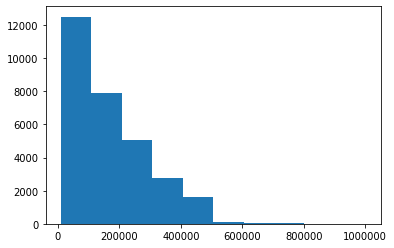

In [23]:
# Histogram of 'LIMIT_BAL'

plt.hist(credit['LIMIT_BAL'])
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

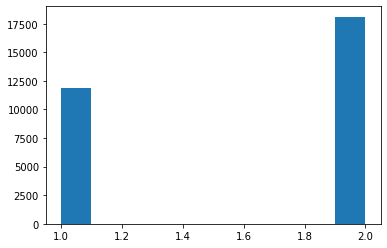

In [24]:
# Histogram of 'SEX'

plt.hist(credit['SEX'])
plt.show


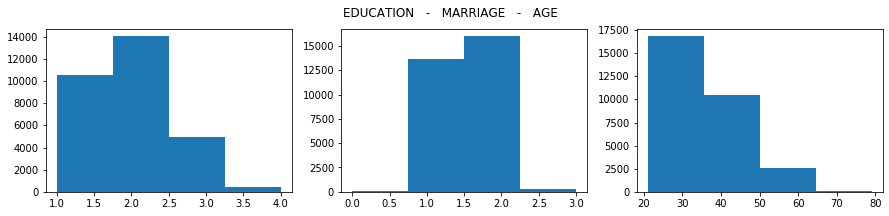

In [25]:
# Visualizing EDUCATION, MARRIAGE and AGE

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.hist(credit['EDUCATION'], bins=4)
plt.subplot(132)
plt.hist(credit['MARRIAGE'], bins=4)
plt.subplot(133)
plt.hist(credit['AGE'], bins=4)
plt.suptitle('EDUCATION   -   MARRIAGE   -   AGE')
plt.show()


Text(0.5, 1.0, 'Default Credit Card Clients \n Default = 0, Not Default = 1')

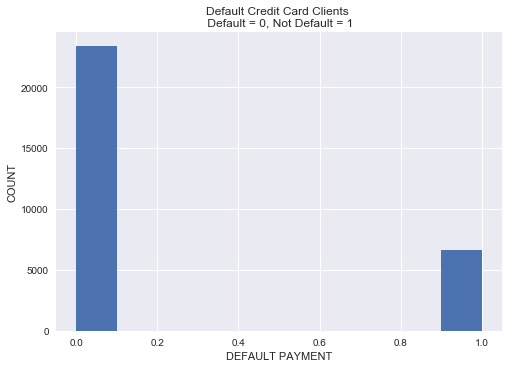

In [26]:
# Visualizing DEFAULT Payment

plt.style.use('seaborn')
credit['DEFAULT'].hist()
plt.xlabel('DEFAULT PAYMENT')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients \n Default = 0, Not Default = 1')


In [27]:
# Reset to original matplotlib.pyplot style

plt.rcParams.update(plt.rcParamsDefault)


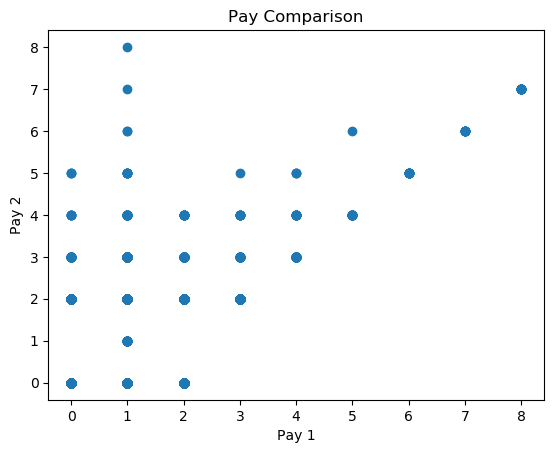

In [28]:
# Scatter plots

x = credit['PAY_1']
y = credit['PAY_2']
plt.scatter(x,y)
plt.title("Pay Comparison")
plt.xlabel("Pay 1")
plt.ylabel("Pay 2")
plt.show()


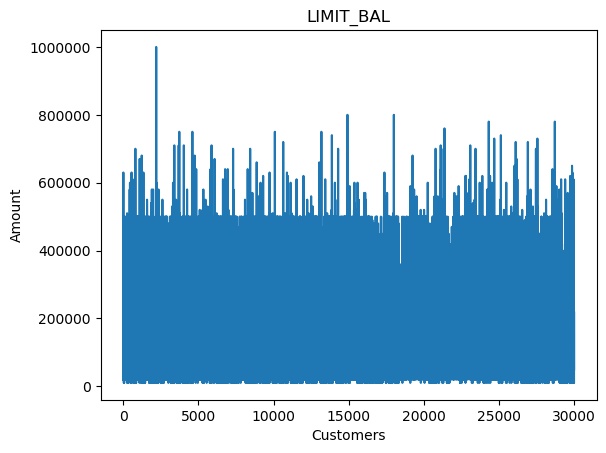

In [29]:
# Line Plots
# Added title and labels

plt.plot(credit['LIMIT_BAL'])
plt.title("LIMIT_BAL")
plt.xlabel("Customers")
plt.ylabel("Amount")
plt.show()


In [30]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]

In [31]:
# Reset to original matplotlib.pyplot style

plt.rcParams.update(plt.rcParamsDefault)


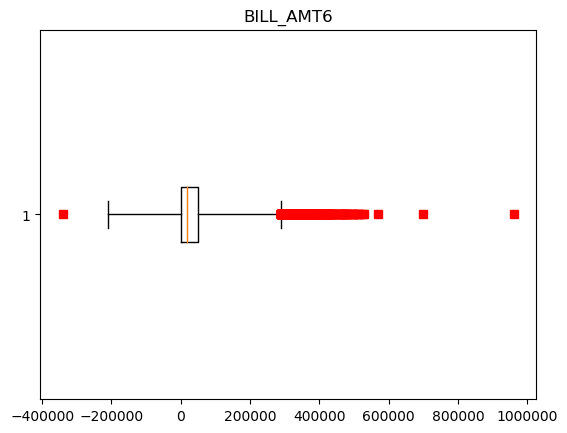

In [32]:
# Plot BILL_AMT6 horizontal 

B = credit["BILL_AMT6"]
plt.boxplot(B,0,'rs',0, 5)
plt.title("BILL_AMT6")

plt.show()


#### Covariance Estimation

In [33]:
# Covariance coefficient matrix

covMat = credit.cov()
print(covMat)


              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7323.669658   
SEX        1.571051e+03     0.239247      0.004962    -0.008014   
EDUCATION -2.232223e+04     0.004962      0.554272    -0.057954   
MARRIAGE  -7.323670e+03    -0.008014     -0.057954     0.272452   
AGE        1.730767e+05    -0.409726      1.251988    -1.992764   
PAY_1     -1.684999e+04    -0.012826      0.031675    -0.004654   
PAY_2     -2.050652e+04    -0.017549      0.037448    -0.004149   
PAY_3     -1.962539e+04    -0.015942      0.031229     0.000296   
PAY_4     -1.783762e+04    -0.014793      0.029017    -0.001605   
PAY_5     -1.583497e+04    -0.013527      0.021172    -0.001039   
PAY_6     -1.557815e+04    -0.011220      0.015271     0.000765   
BILL_AMT1  2.727020e+09 -1211.694332    909.885257  -902.154685   
BILL_AMT2  2.570130e+09 -1085.595467    634.798683  -802.517866   
BILL_AMT3  2.548533e+09  -833.207432    346.636738  -901.67908

In [34]:
# Covariance coefficient matrix - Selecting specific features/variables to measure - Using iloc"
# Selecting 4 features/variables

covMat = credit.cov()
print(covMat.iloc[0:4])


              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7323.669658   
SEX        1.571051e+03     0.239247      0.004962    -0.008014   
EDUCATION -2.232223e+04     0.004962      0.554272    -0.057954   
MARRIAGE  -7.323670e+03    -0.008014     -0.057954     0.272452   

                     AGE         PAY_1         PAY_2         PAY_3  \
LIMIT_BAL  173076.722569 -16849.985183 -20506.516281 -19625.387225   
SEX            -0.409726     -0.012826     -0.017549     -0.015942   
EDUCATION       1.251988      0.031675      0.037448      0.031229   
MARRIAGE       -1.992764     -0.004654     -0.004149      0.000296   

                  PAY_4         PAY_5  ...     BILL_AMT4     BILL_AMT5  \
LIMIT_BAL -17837.621149 -15834.971970  ...  2.453926e+09  2.331481e+09   
SEX           -0.014793     -0.013527  ... -6.884896e+02 -5.056943e+02   
EDUCATION      0.029017      0.021172  ... -2.936362e+02 -5.630082e+02   
MARRIAGE      -0.

In [35]:
# Covariance (Partial) - 4 features/variables

Part = pd.DataFrame(credit, columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE'])

covPart = Part.cov()
print(covPart)                                     
                      

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7323.669658
SEX        1.571051e+03     0.239247      0.004962    -0.008014
EDUCATION -2.232223e+04     0.004962      0.554272    -0.057954
MARRIAGE  -7.323670e+03    -0.008014     -0.057954     0.272452


In [36]:
# Covariance PAY_X (behavior)

Pay = pd.DataFrame(credit, columns=['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

covPay = Pay.cov()
print(covPay)                                     
                     

          PAY_1     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6
PAY_1  0.578503  0.425870  0.310863  0.266423  0.231717  0.203409
PAY_2  0.425870  0.642767  0.420569  0.312896  0.266255  0.233499
PAY_3  0.310863  0.420569  0.625031  0.408531  0.312893  0.278751
PAY_4  0.266423  0.312896  0.408531  0.579292  0.407197  0.328283
PAY_5  0.231717  0.266255  0.312893  0.407197  0.515122  0.380161
PAY_6  0.203409  0.233499  0.278751  0.328283  0.380161  0.511851


In [37]:
# Covariance BILL_AMTX 

Bill = pd.DataFrame(credit, columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

covBill = Bill.cov()
print(covBill)  


              BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4  \
BILL_AMT1  5.422240e+09  4.986670e+09  4.556511e+09  4.075286e+09   
BILL_AMT2  4.986670e+09  5.065705e+09  4.582086e+09  4.086508e+09   
BILL_AMT3  4.556511e+09  4.582086e+09  4.809338e+09  4.122238e+09   
BILL_AMT4  4.075286e+09  4.086508e+09  4.122238e+09  4.138716e+09   
BILL_AMT5  3.714795e+09  3.720401e+09  3.726780e+09  3.677105e+09   
BILL_AMT6  3.519876e+09  3.524868e+09  3.524247e+09  3.451762e+09   

              BILL_AMT5     BILL_AMT6  
BILL_AMT1  3.714795e+09  3.519876e+09  
BILL_AMT2  3.720401e+09  3.524868e+09  
BILL_AMT3  3.726780e+09  3.524247e+09  
BILL_AMT4  3.677105e+09  3.451762e+09  
BILL_AMT5  3.696294e+09  3.425914e+09  
BILL_AMT6  3.425914e+09  3.546692e+09  


In [38]:
# Covariance PAY_AMTX 

PayAmt = pd.DataFrame(credit, columns=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

covPayAmt = PayAmt.cov()
print(covPayAmt)      


              PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4  \
PAY_AMT1  2.743423e+08  1.089849e+08  7.354626e+07  5.178189e+07   
PAY_AMT2  1.089849e+08  5.308817e+08  9.929841e+07  6.501168e+07   
PAY_AMT3  7.354626e+07  9.929841e+07  3.100051e+08  5.966970e+07   
PAY_AMT4  5.178189e+07  6.501168e+07  5.966970e+07  2.454286e+08   
PAY_AMT5  3.756893e+07  6.368414e+07  4.282921e+07  3.634098e+07   
PAY_AMT6  5.469033e+07  6.456816e+07  5.093879e+07  4.395747e+07   

              PAY_AMT5      PAY_AMT6  
PAY_AMT1  3.756893e+07  5.469033e+07  
PAY_AMT2  6.368414e+07  6.456816e+07  
PAY_AMT3  4.282921e+07  5.093879e+07  
PAY_AMT4  3.634098e+07  4.395747e+07  
PAY_AMT5  2.334266e+08  4.207110e+07  
PAY_AMT6  4.207110e+07  3.160383e+08  


#### Exploratory Data Analysis

In [39]:
# Explore credit dataset

credit.describe().transpose()

count           mean            std       min       25%  \
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.842267       0.744494       1.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_1      30000.0       0.356767       0.760594       0.0      0.00   
PAY_2      30000.0       0.320033       0.801727       0.0      0.00   
PAY_3      30000.0       0.304067       0.790589       0.0      0.00   
PAY_4      30000.0       0.258767       0.761113       0.0      0.00   
PAY_5      30000.0       0.221500       0.717720       0.0      0.00   
PAY_6      30000.0       0.226567       0.715438       0.0      0.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULT    30000.0       0.221200       0.415062       0.0      0.00   

                50%        75%        max  
LIMIT_BAL  140000.0  240000.00  1000000.0  
SEX             2.0       2.00        2.0  
EDUCATION       2.0       2.00        4.0  
MARRIAGE        2.0       2.00        3.0  
AGE            34.0      41.00       79.0  
PAY_1           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0  
DEFAULT         0.0       0.00        1.0

In [40]:
# Number of customer for each SEX level: 1 = male; 2 = female

sexCount = credit.groupby('SEX')['SEX'].count()
sexCount.count


<bound method Series.count of SEX
1    11888
2    18112
Name: SEX, dtype: int64>

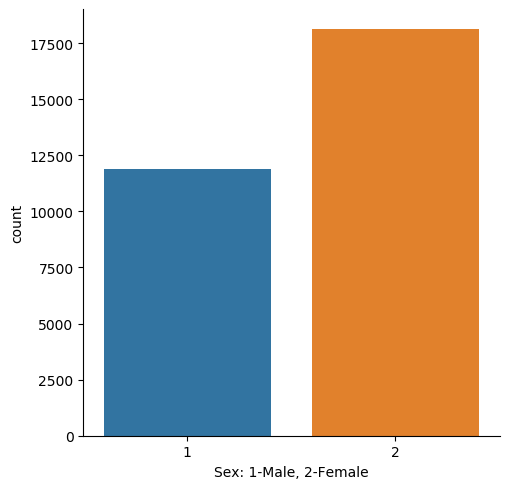

In [41]:
# Using seaborn to plot the count of SEX level

fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.0)
fg.set_xlabels('Sex: 1-Male, 2-Female')


In [42]:
# Number of customer for each EDUCATION level: 1 = graduate school; 2 = university; 3 = high school; 4 = others

educationCount = credit.groupby('EDUCATION')['EDUCATION'].count()
educationCount.count


<bound method Series.count of EDUCATION
1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64>

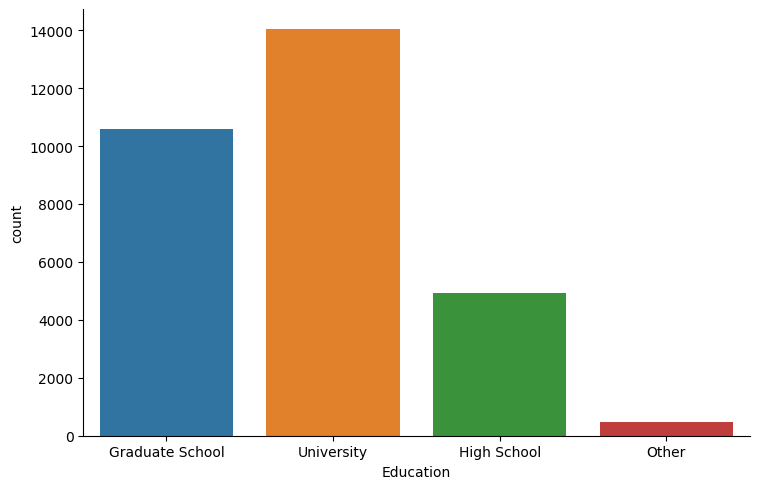

In [43]:
# Using seaborn to plot the count of EDUCATION level

fg = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Education')
fg.set_xticklabels(['Graduate School','University','High School','Other'])


In [44]:
# Number of customer for each MARRIAGE level: 1 = married; 2 = single; 3 = divorce; 0=others

marriageCount = credit.groupby('MARRIAGE')['MARRIAGE'].count()
marriageCount.count


<bound method Series.count of MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64>

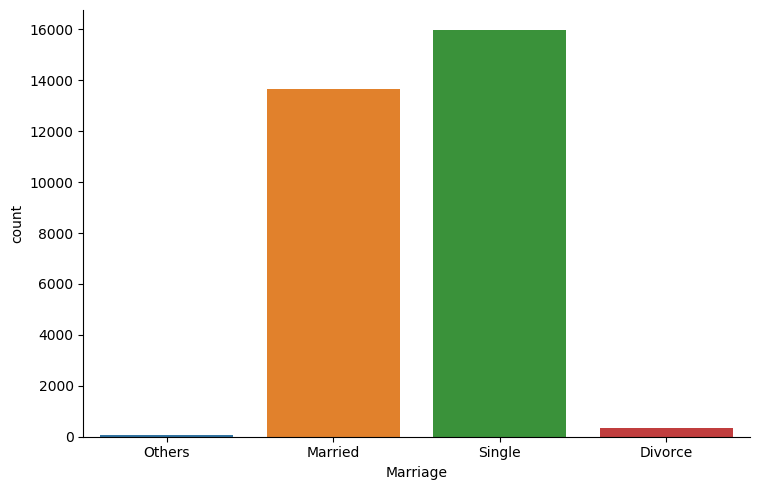

In [45]:
# Using seaborn to plot the count of MARRIAGE level

fg = sns.catplot('MARRIAGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Marriage')
fg.set_xticklabels(['Others','Married','Single','Divorce'])

In [46]:
# Number of customer for each AGE level

ageCount = credit.groupby('AGE')['AGE'].count()
ageCount.count


<bound method Series.count of AGE
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64>

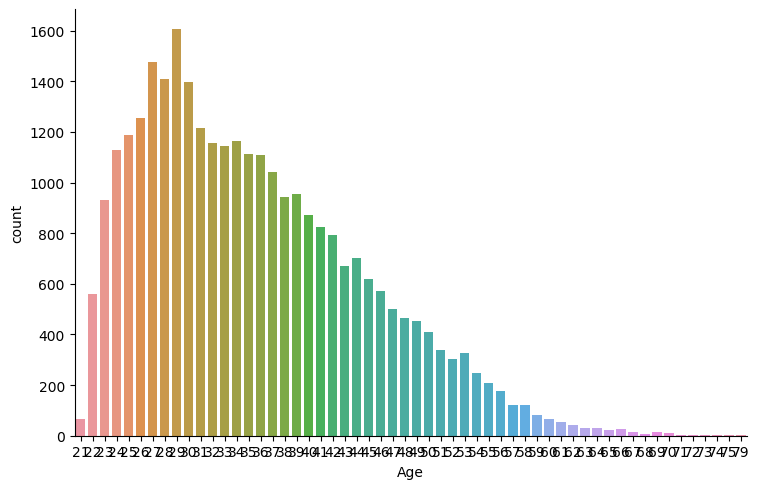

In [47]:
# Using seaborn to plot the count of AGE level

fg = sns.catplot('AGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Age')


In [48]:
# Number of male and female in each level of EDUCATION

sexeducationCount = credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()
sexeducationCount.count


<bound method Series.count of SEX  EDUCATION
1    1            4354
     2            5374
     3            1990
     4             170
2    1            6231
     2            8656
     3            2927
     4             298
Name: SEX, dtype: int64>

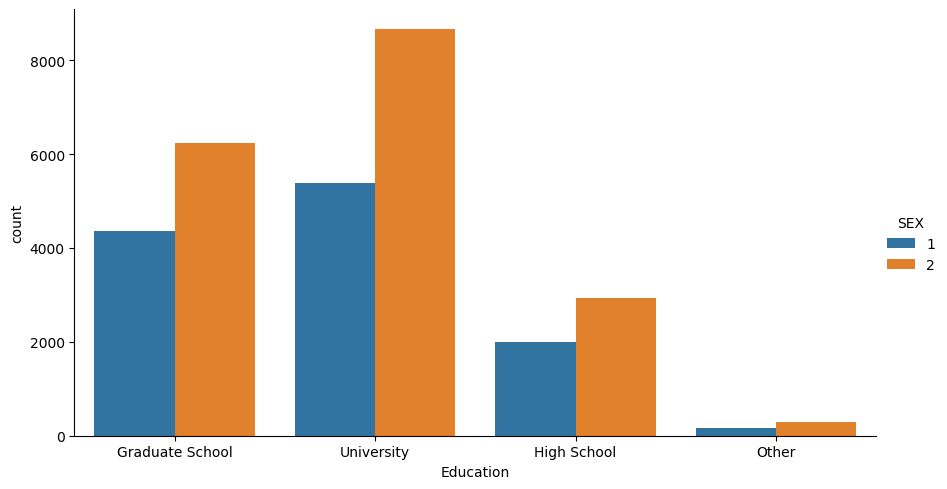

In [49]:
# Plot the SEX by each level of EDUCATION

fg = sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)
fg.set_xlabels('Education')
fg.set_xticklabels(['Graduate School','University','High School','Other'])


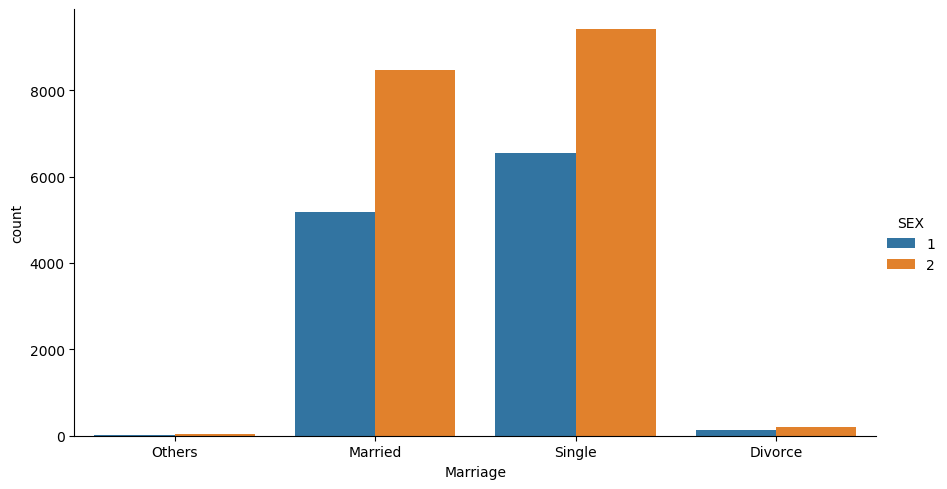

In [50]:
# Plot the SEX by each level of MARRIAGE

fg = sns.catplot('MARRIAGE', data=credit, hue='SEX', kind='count', aspect=1.75)
fg.set_xlabels('Marriage')
fg.set_xticklabels(['Others','Married','Single','Divorce'])


In [51]:
# Pivot Table
# Sum of the LIMIT_BAL group by SEX/EDUCATION 

credit.pivot_table('LIMIT_BAL', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)


EDUCATION           1           2          3         4         All
SEX                                                               
1           954620000   719590000  240677680  29036000  1943923680
2          1299520000  1343696000  381570000  55820000  3080606000
All        2254140000  2063286000  622247680  84856000  5024529680

In [52]:
# Table Analysis of EDUCATION to DEFAULT

education0 = credit.groupby(credit['EDUCATION'][credit['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
education1 = credit.groupby(credit['EDUCATION'][credit['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
totaleducation = credit.groupby('EDUCATION').size().reset_index(name='TOTAL')

educationTable = education0.join(education1['DEFAULT']).join(totaleducation['TOTAL'])
educationTable['EDUCATION'] = ['Graduate School','University','High School','Other']

educationTable


EDUCATION  NOT_DEFAULT  DEFAULT  TOTAL
0  Graduate School         8549     2036  10585
1       University        10700     3330  14030
2      High School         3680     1237   4917
3            Other          435       33    468

In [53]:
# Table Analysis of MARRIAGE to DEFAULT

marriage0 = credit.groupby(credit['MARRIAGE'][credit['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
marriage1 = credit.groupby(credit['MARRIAGE'][credit['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
totalmarriage = credit.groupby('MARRIAGE').size().reset_index(name='TOTAL')

marriageTable = marriage0.join(marriage1['DEFAULT']).join(totalmarriage['TOTAL'])
marriageTable['MARRIAGE'] = ['Others','Married','Single','Divorce']

marriageTable


MARRIAGE  NOT_DEFAULT  DEFAULT  TOTAL
0   Others           49        5     54
1  Married        10453     3206  13659
2   Single        12623     3341  15964
3  Divorce          239       84    323

In [54]:
# Table Analysis of MARRIAGE to SEX

sex0 = credit.groupby(credit['SEX'][credit['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
sex1 = credit.groupby(credit['SEX'][credit['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
totalsex = credit.groupby('SEX').size().reset_index(name='TOTAL')

sexTable = sex0.join(sex1['DEFAULT']).join(totalsex['TOTAL'])
sexTable['SEX'] = ['Male','Female']

sexTable


SEX  NOT_DEFAULT  DEFAULT  TOTAL
0    Male         9015     2873  11888
1  Female        14349     3763  18112

In [55]:
# Table
# Customers DEFAULT/NOT DEFAULT grouped by EDUCATION and SEX
table = pd.crosstab(index=[credit['DEFAULT'],credit['EDUCATION']], columns=[credit['SEX']])

table.unstack()


SEX           1                      2                 
EDUCATION     1     2     3    4     1     2     3    4
DEFAULT                                                
0          3448  3966  1445  156  5101  6734  2235  279
1           906  1408   545   14  1130  1922   692   19

In [56]:
# Table
# Customers DEFAULT/NOT DEFAULT grouped by EDUCATION, SEX and MARRIAGE

table = pd.crosstab(index=[credit['DEFAULT'],credit['EDUCATION']], columns=[credit['MARRIAGE'],credit['SEX']])

table.unstack()


MARRIAGE   0                            1        ...    2        3             \
SEX        1            2               1        ...    2        1              
EDUCATION  1  2   3  4  1  2   3  4     1     2  ...    3    4   1   2   3  4   
DEFAULT                                          ...                            
0          1  1  10  0  3  4  30  0  1300  1727  ...  792  128  20  44  25  2   
1          0  0   2  0  0  1   2  0   390   643  ...  223   12  10  19  11  0   

MARRIAGE                  
SEX         2             
EDUCATION   1   2   3  4  
DEFAULT                   
0          17  74  51  6  
1           3  25  16  0  

[2 rows x 32 columns]

Text(0.5, 1.0, "Distribution of Customers' Ages")

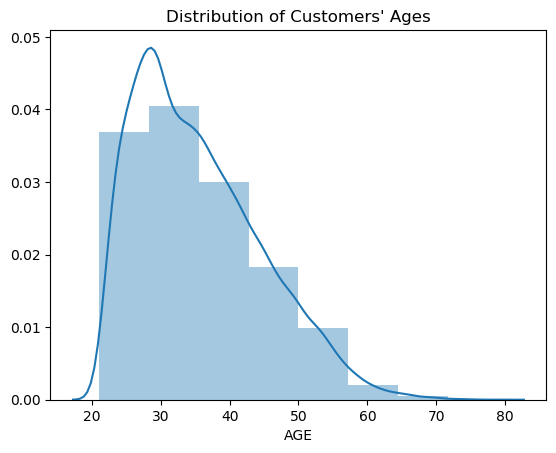

In [57]:
# Distribution of AGE (8 bins), with an overlay of a density plot  

age_dist = sns.distplot(credit['AGE'], bins=8)
age_dist.set_title("Distribution of Customers' Ages")


Text(0.5, 1.0, "Distribution of Customers' Limit Balance")

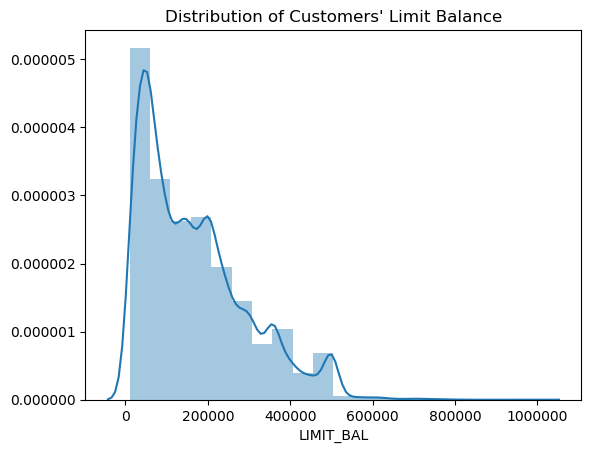

In [58]:
# Distribution of LIMIT_BAL (20 bins), with an overlay of a density plot  

age_dist = sns.distplot(credit['LIMIT_BAL'], bins=20)
age_dist.set_title("Distribution of Customers' Limit Balance")


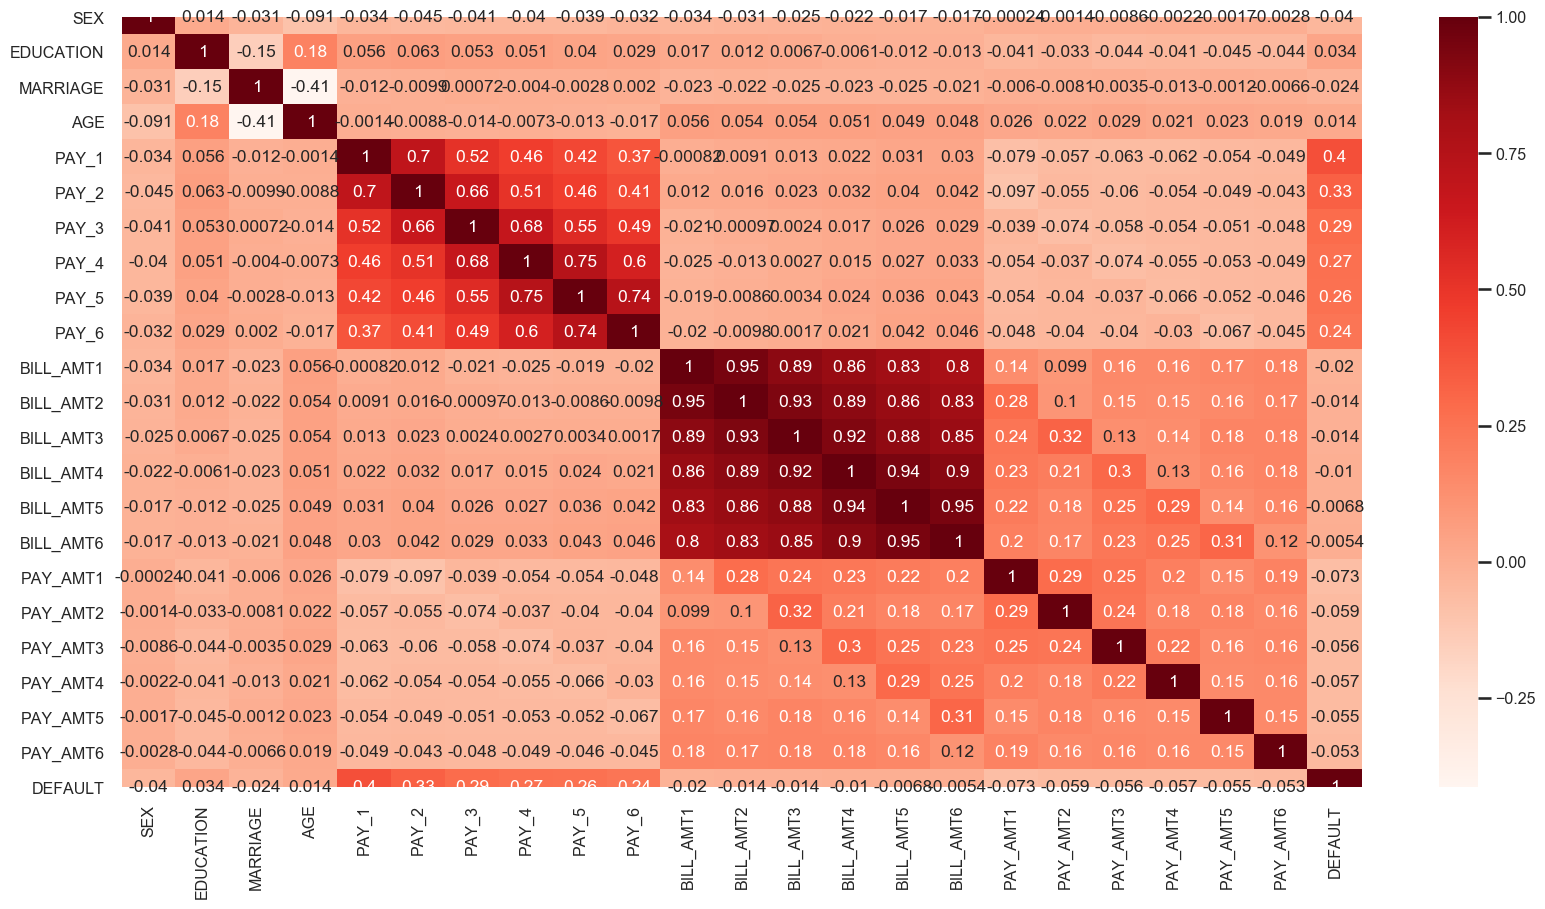

In [59]:
# Correlation - Higher correlation of DEFAULT with History of past payments PAY_1, PAY_2, ..... PAY_6

sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(credit.iloc[:,1:].corr(), cmap='Reds', annot=True);


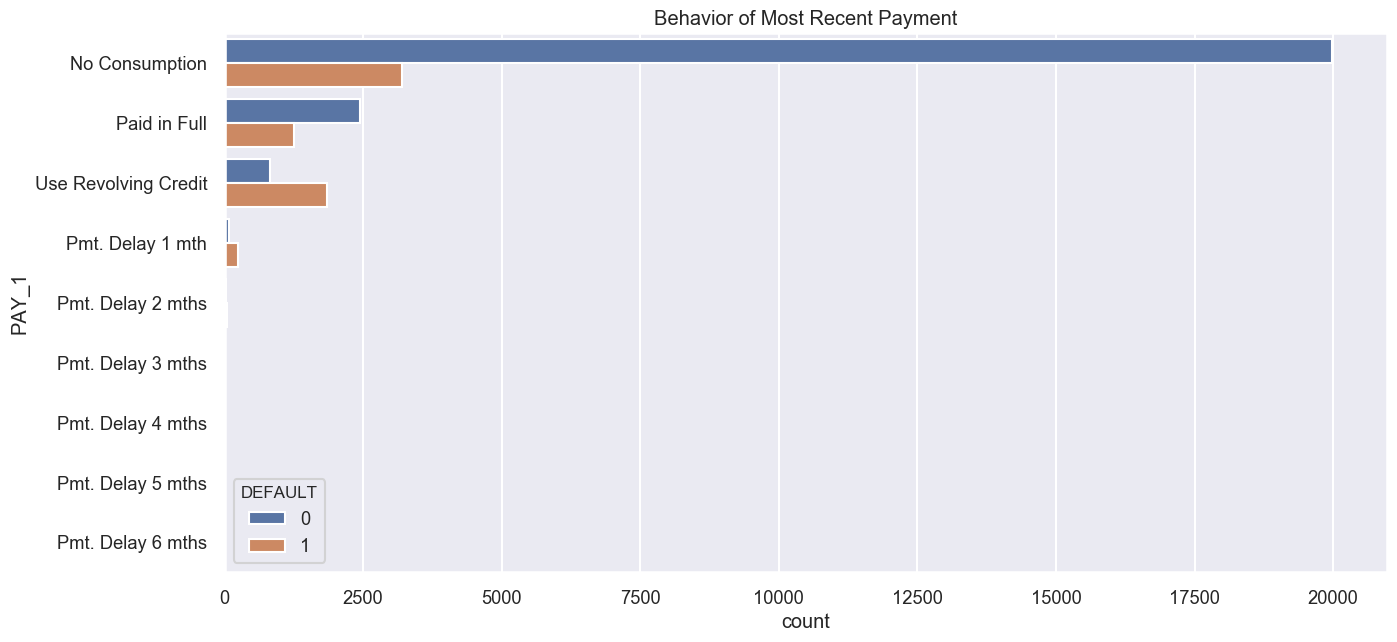

In [60]:
# Plot for PAY_1 (behavior of most recent payment)

sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='DEFAULT', data=credit)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Pmt. Delay 1 mth','Pmt. Delay 2 mths'
                     ,'Pmt. Delay 3 mths','Pmt. Delay 4 mths','Pmt. Delay 5 mths','Pmt. Delay 6 mths','Pmt. Delay 7 mths','Pmt. Delay 8 mths'])
pay1.set_title('Behavior of Most Recent Payment')

plt.show()


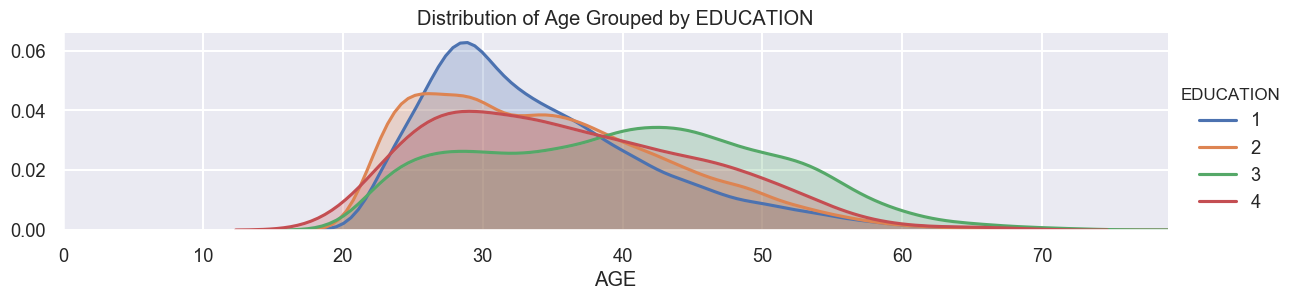

In [61]:
# kde plot of Distribution of Customers' Ages

fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by EDUCATION')
fig.add_legend()


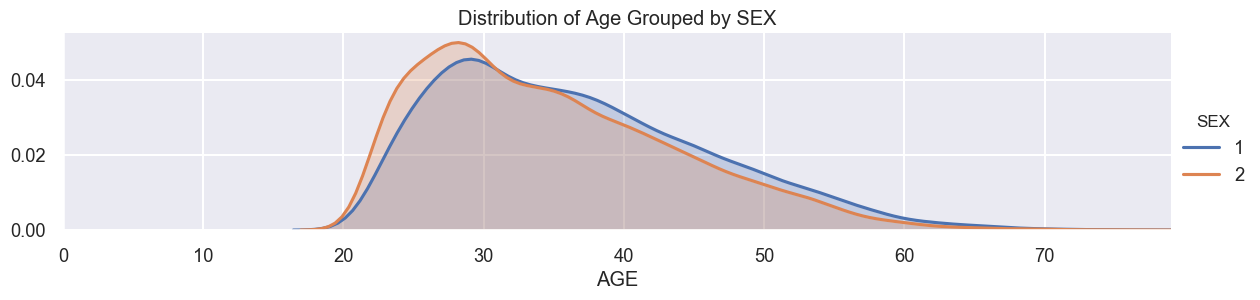

In [62]:
# kde plot of Distribution of Customers' Ages

fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by SEX')
fig.add_legend()


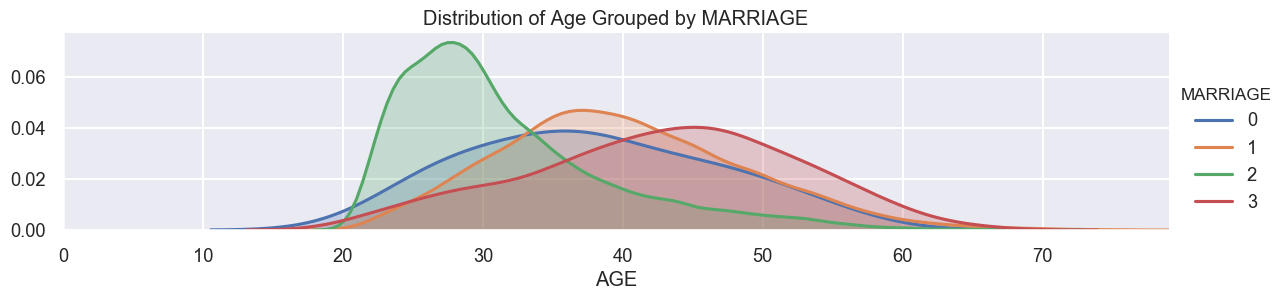

In [63]:
# kde plot of Distribution of Customers' Ages

fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by MARRIAGE')
fig.add_legend()


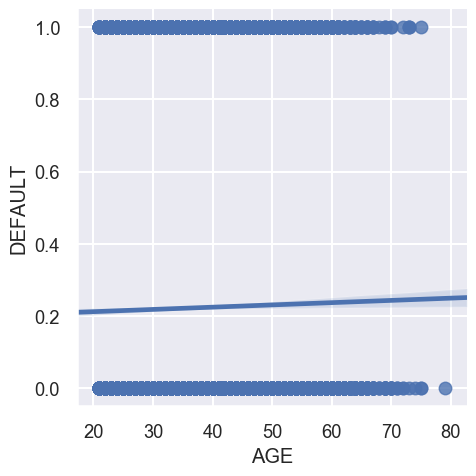

In [64]:
# Linear plot of AGE vs. DEFAULT (trend: Older AGE a higher rate of DEFAULT)

sns.lmplot('AGE', 'DEFAULT', data=credit)


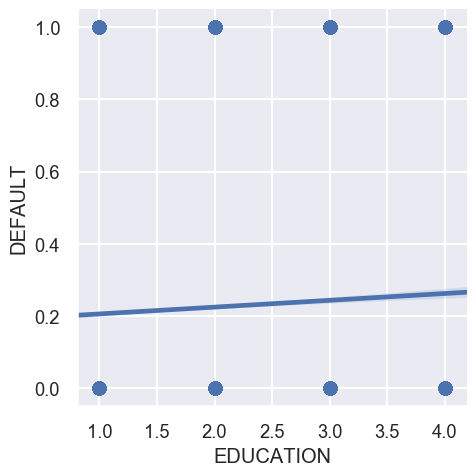

In [65]:
# Linear plot of EDUCATION vs. DEFAULT (trend: Less EDUCATION a higher rate of DEFAULT)

sns.lmplot('EDUCATION', 'DEFAULT', data=credit)


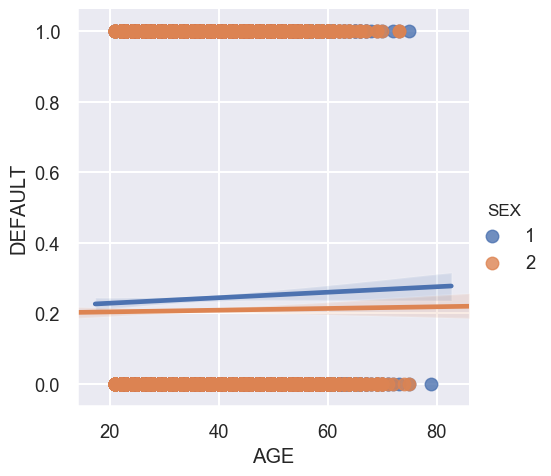

In [66]:
# Linear plot of AGE vs. DEFAULT (trend: Older AGE a higher rate of DEFAULT with SEX as a fector, Male riskier that Female)

sns.lmplot('AGE', 'DEFAULT', data=credit, hue='SEX')


In [67]:
# Define a function to loop through 6 values and form the attribute/feature name

def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

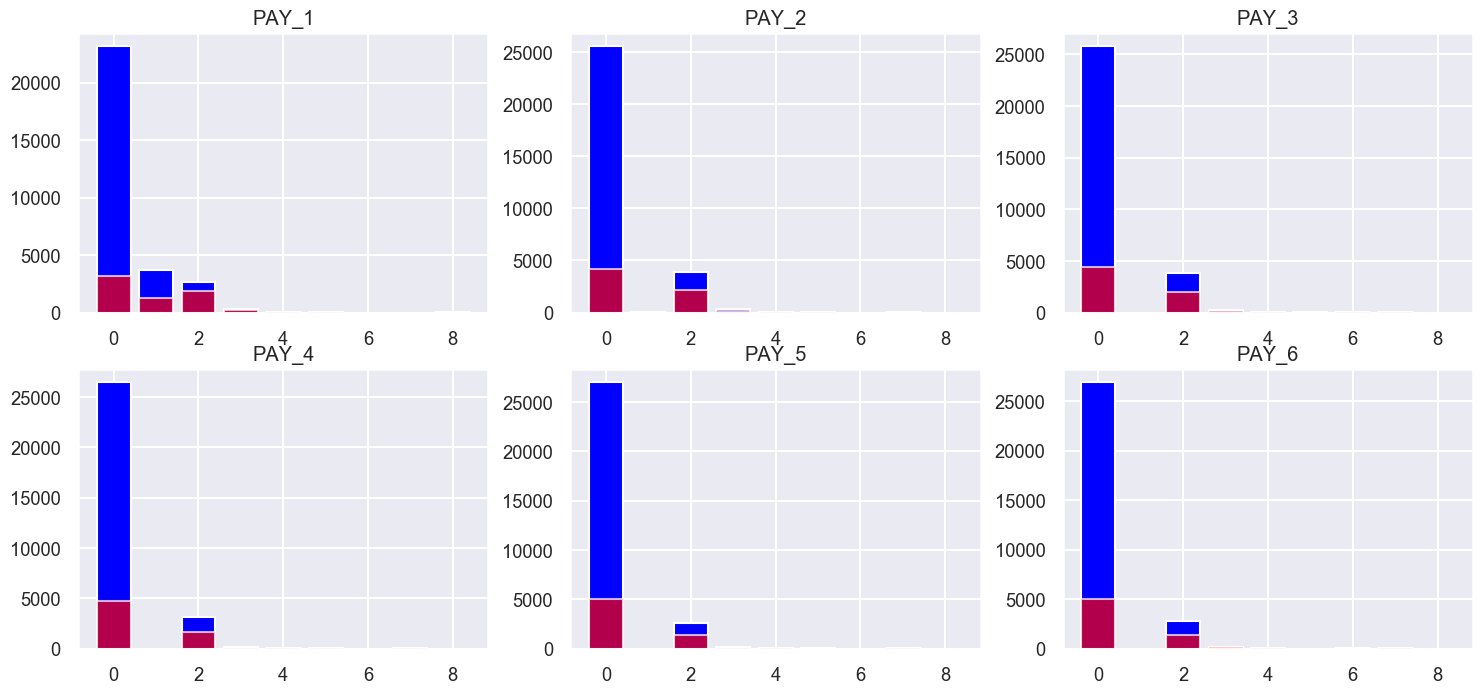

In [68]:
# Use defined getColumnsNames function to loop through 'PAY_1' to 'PAY_6' and compare to DEFAULT 

pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d = credit[pay_status_columns[i]].value_counts()
    x = credit[pay_status_columns[i]][(credit['DEFAULT']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='blue')
    ax[row,col].bar(x.index, x, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
    

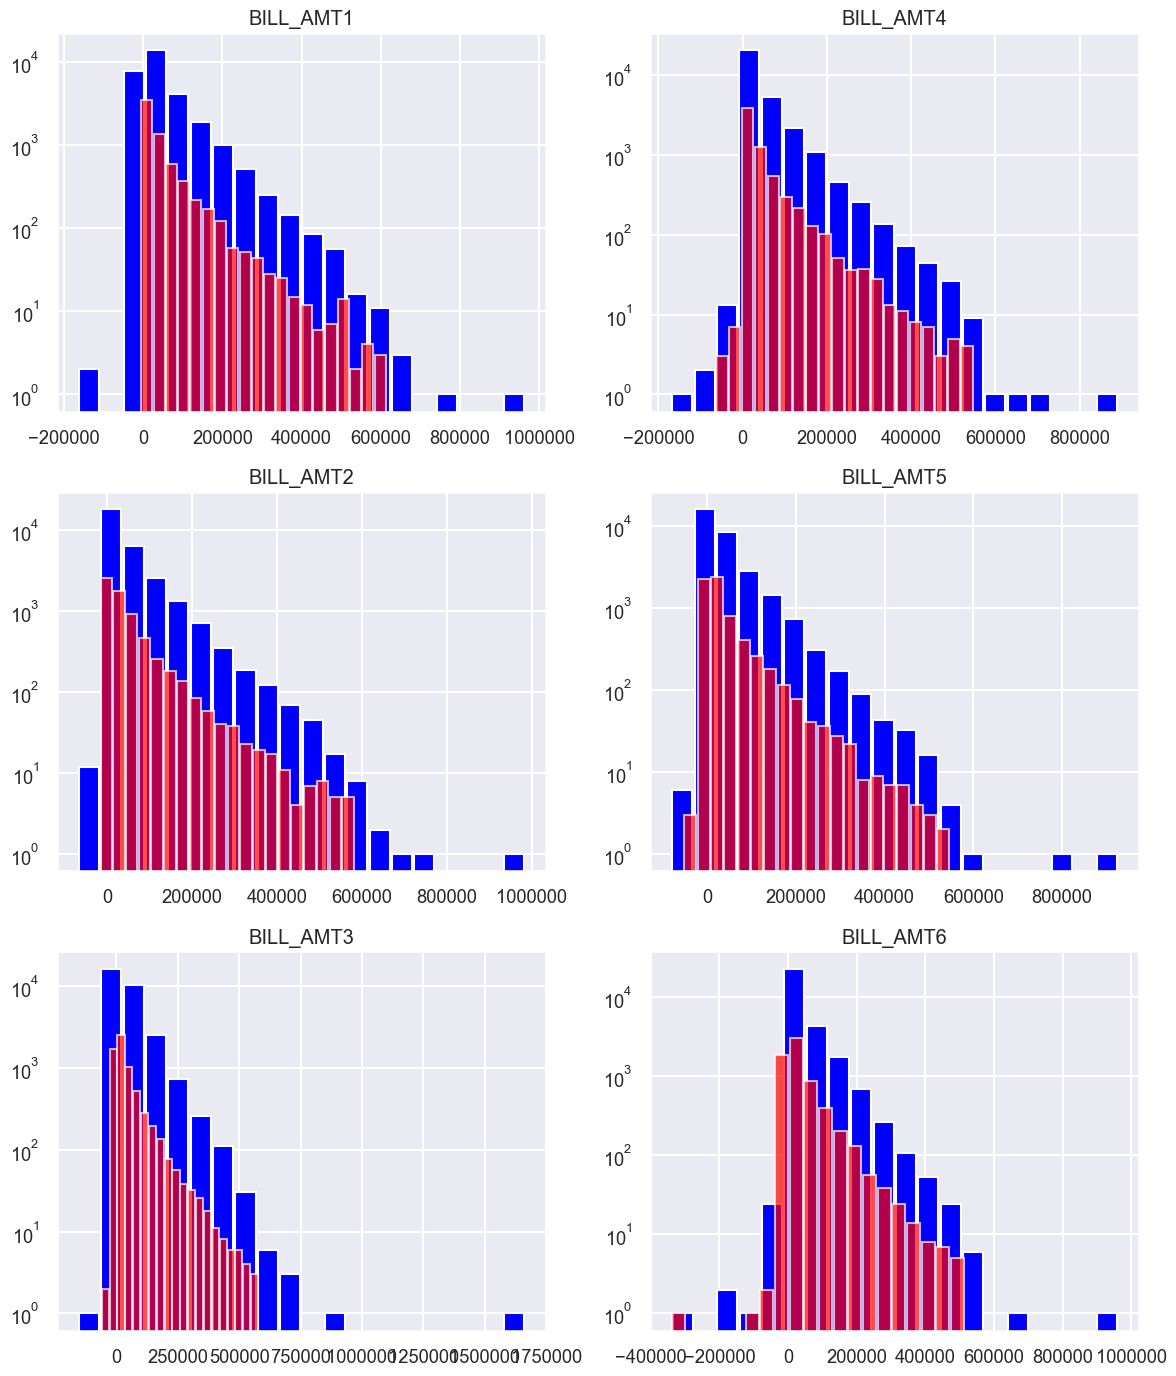

In [69]:
# Use defined getColumnsNames function to loop through 'BILL_AMT1' to 'BILL_AMT6' and compare to DEFAULT

bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(12,14)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[bill_atm_columns[i]], 20,rwidth=0.9, color ='blue')
    ax[row,col].hist(credit[bill_atm_columns[i]][(credit['DEFAULT']==1)],20,rwidth=0.9,color='red',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])

    # scaling graph
    ax[row,col].set_yscale('log', nonposy='clip')

    plt.tight_layout()
plt.show()



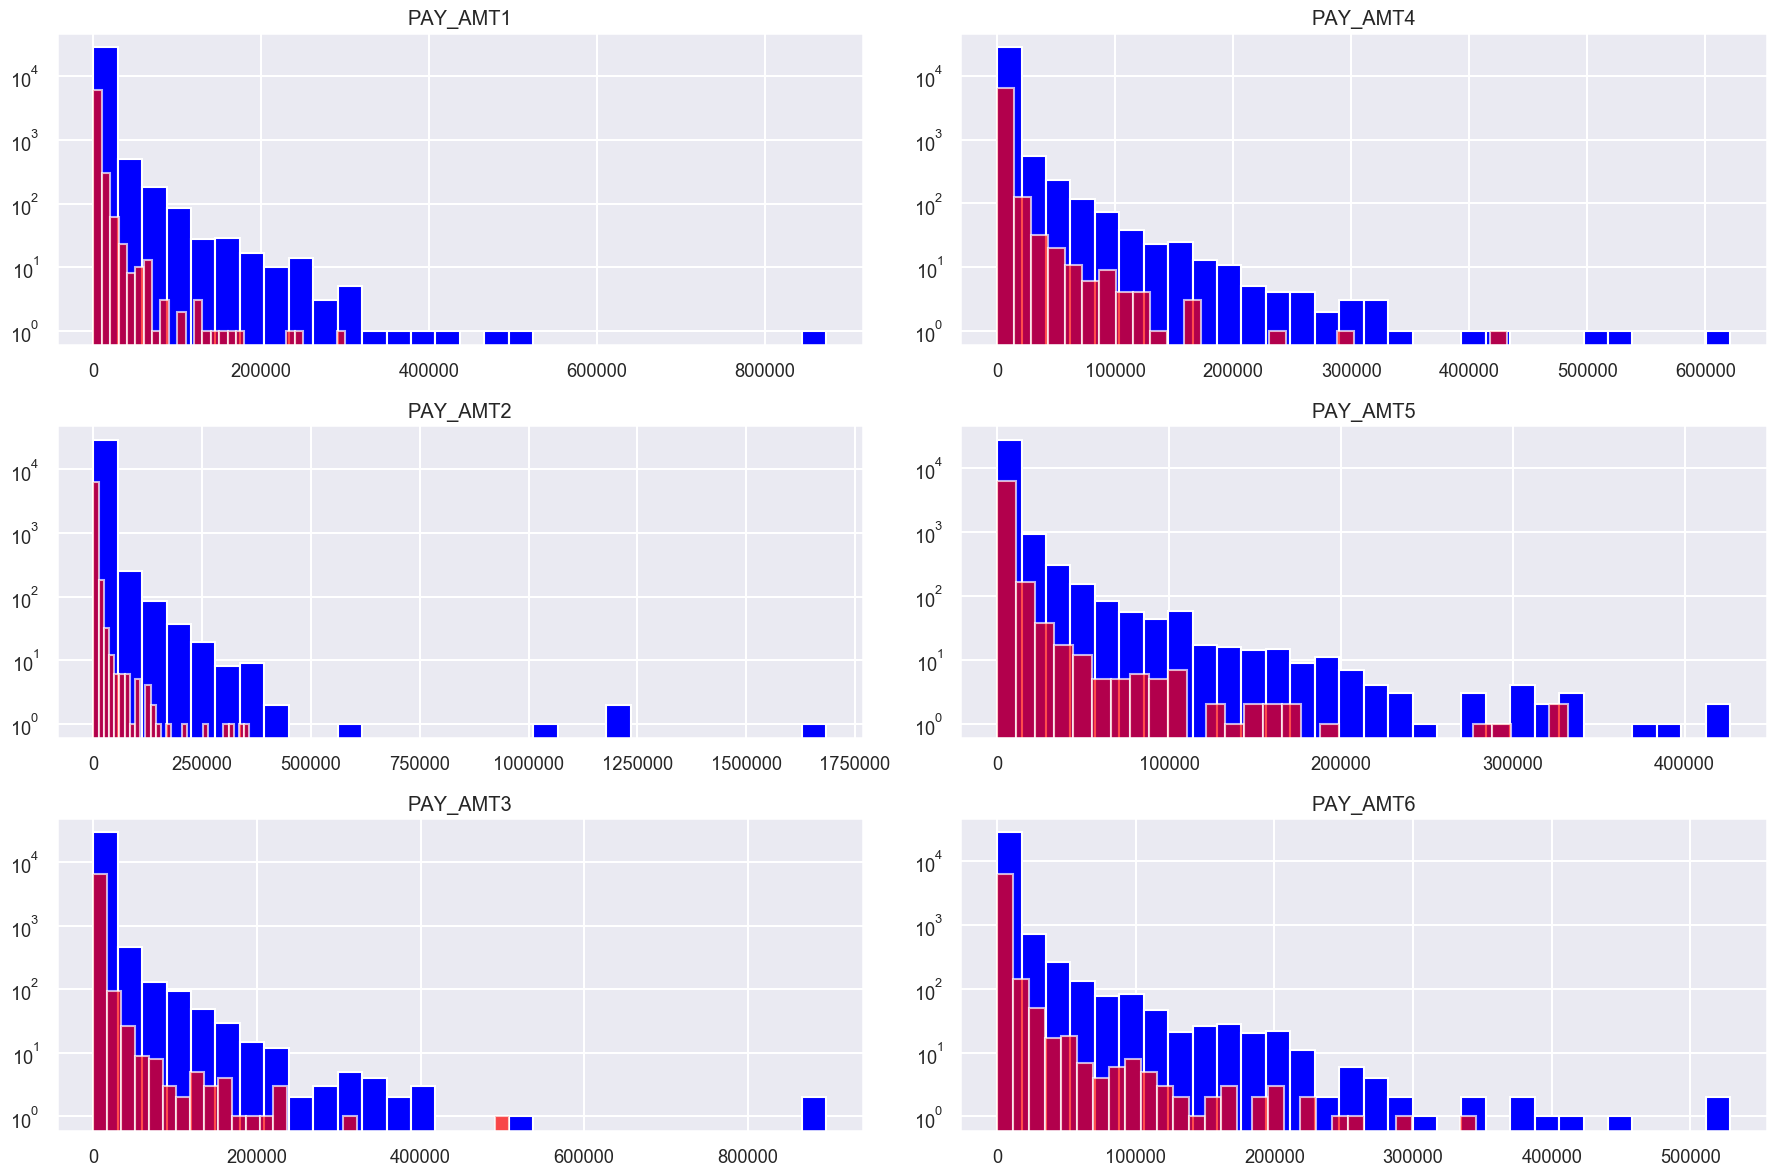

In [81]:
# Use defined getColumnsNames function to loop through 'PAY_AMT1' to 'PAY_AMT6' and compare to DEFAULT

pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,12)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[pay_amt_columns[i]], 30, color ='blue')
    ax[row,col].hist(credit[pay_amt_columns[i]][(credit['DEFAULT']==1)],30,color='red',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])

    # scaling graph
    ax[row,col].set_yscale('log', nonposy='clip')
    
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'AGE')

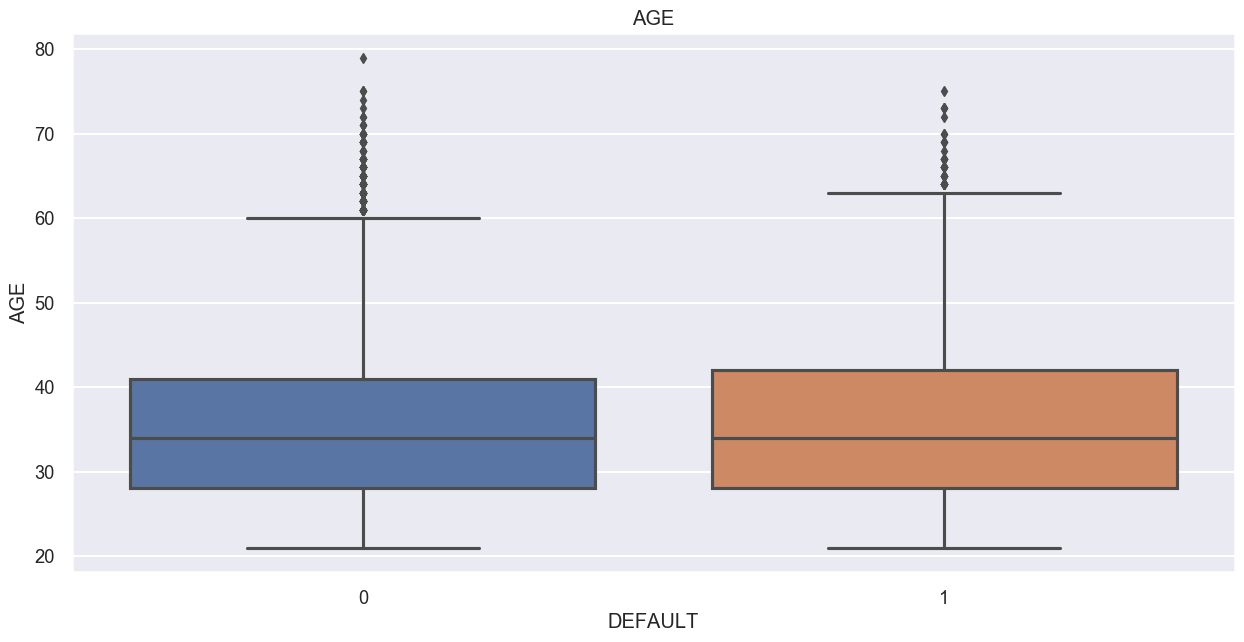

In [82]:
# Plot DEFAULT / AGE

sns.boxplot(x='DEFAULT',y='AGE',data=credit).set_title('AGE')


Text(0.5, 1.0, 'SEX')

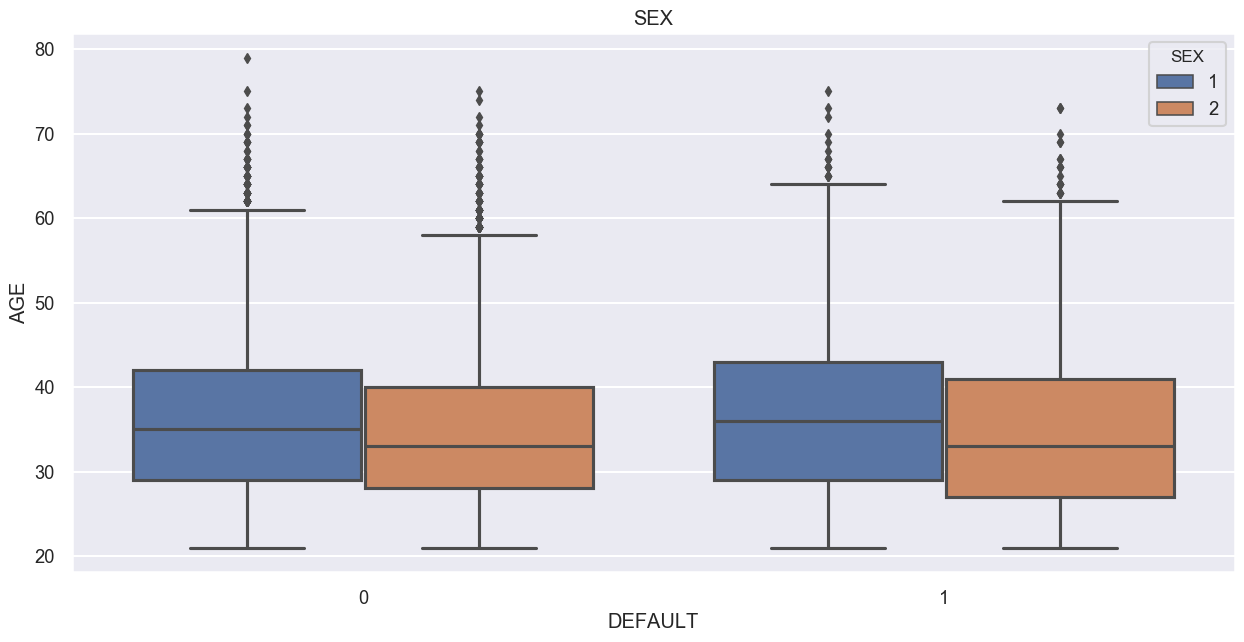

In [83]:
# Plot DEFAULT / SEX

sns.boxplot(x='DEFAULT',hue='SEX', y='AGE',data=credit).set_title('SEX')


Text(0.5, 1.0, 'EDUCATION: 1-Graduate School, 2-University, 3-High School, 4-Other')

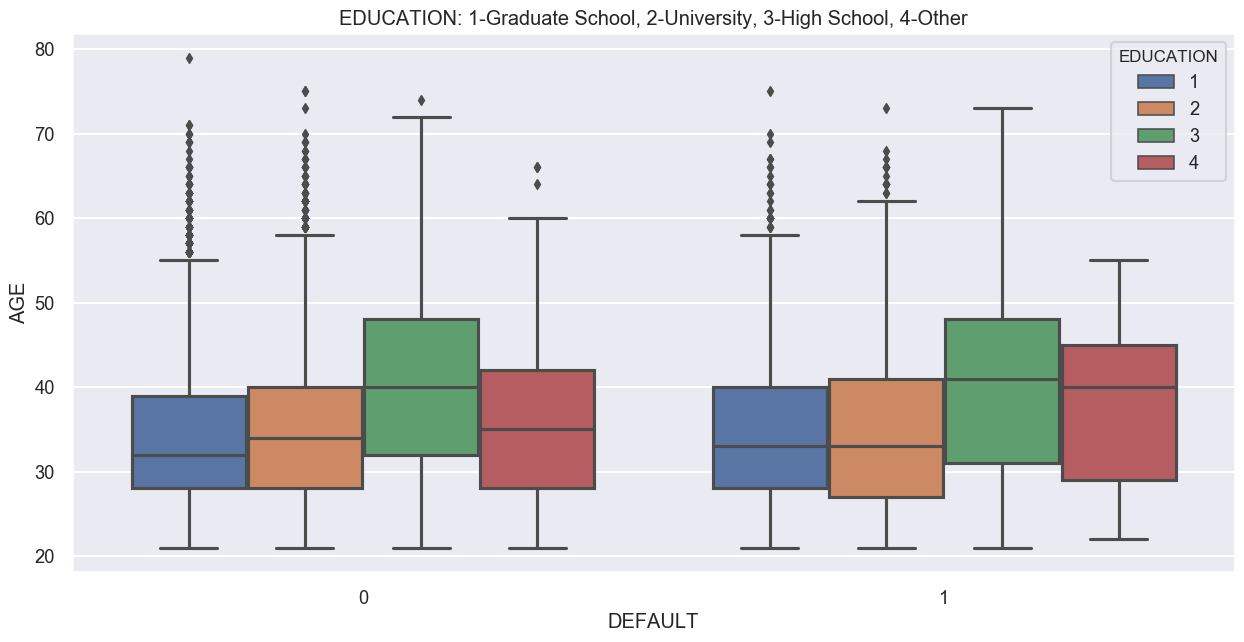

In [84]:
# Plot DEFAULT / EDUCATION

sns.boxplot(x='DEFAULT',hue='EDUCATION', y='AGE',data=credit).set_title('EDUCATION: 1-Graduate School, 2-University, 3-High School, 4-Other')


Text(0.5, 1.0, 'MARRIAGE: 0-Others, 1-Married, 2-Single, 3-Divorce')

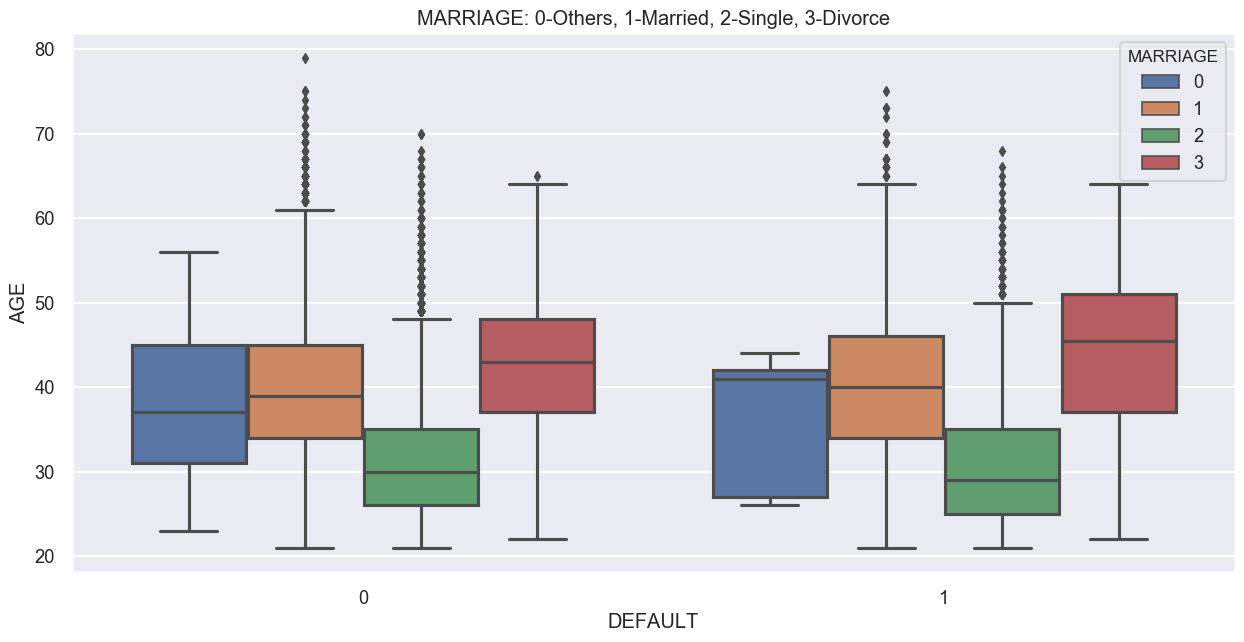

In [85]:
# Plot DEFAULT / MARRIAGE

sns.boxplot(x='DEFAULT',hue='MARRIAGE', y='AGE',data=credit).set_title('MARRIAGE: 0-Others, 1-Married, 2-Single, 3-Divorce')


#### Feature Engineering

In [86]:
# Create a backup of credit dataframe

credit_bkp_20200526_2255 = credit

In [87]:
# Review backup 'credit_bkp_20200526_2255'

credit_bkp_20200526_2255
    

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2      0      0   
1         120000    2          2         2   26      0      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43      0      0      0      0   
29997      30000    1          2         2   37      4      3      2      0   
29998      80000    1          3         1   41      1      0      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0          0  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0             0         0         0         0        1  
1          1000      1000         0      2000        1  
2          1000      1000      1000      5000        0  
3          1200      1100      1069      1000        0  
4         10000      9000       689       679        0  
...         ...       ...       ...       ...      ...  
29995      5003      3047      5000      1000        0  
29996      8998       129         0         0        0  
29997     22000      4200      2000      3100        1  
29998      1178      1926     52964      1804        1  
29999      1430      1000      1000      1000        1  

[30000 rows x 24 columns]

In [225]:
# Create test dataframe for Feature Engineering RFE

creditTest = credit


In [226]:
creditTest

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2      0      0   
1         120000    2          2         2   26      0      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43      0      0      0      0   
29997      30000    1          2         2   37      4      3      2      0   
29998      80000    1          3         1   41      1      0      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0          0  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0             0         0         0         0        1  
1          1000      1000         0      2000        1  
2          1000      1000      1000      5000        0  
3          1200      1100      1069      1000        0  
4         10000      9000       689       679        0  
...         ...       ...       ...       ...      ...  
29995      5003      3047      5000      1000        0  
29996      8998       129         0         0        0  
29997     22000      4200      2000      3100        1  
29998      1178      1926     52964      1804        1  
29999      1430      1000      1000      1000        1  

[30000 rows x 24 columns]

In [227]:
# Confirm integrity of 'credit' original dataframe

credit


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2      0      0   
1         120000    2          2         2   26      0      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43      0      0      0      0   
29997      30000    1          2         2   37      4      3      2      0   
29998      80000    1          3         1   41      1      0      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0          0  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0             0         0         0         0        1  
1          1000      1000         0      2000        1  
2          1000      1000      1000      5000        0  
3          1200      1100      1069      1000        0  
4         10000      9000       689       679        0  
...         ...       ...       ...       ...      ...  
29995      5003      3047      5000      1000        0  
29996      8998       129         0         0        0  
29997     22000      4200      2000      3100        1  
29998      1178      1926     52964      1804        1  
29999      1430      1000      1000      1000        1  

[30000 rows x 24 columns]

In [228]:
# Define dependent variable

depVarT = creditTest['DEFAULT']


In [229]:
# Review dependent variable

depVarT


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64

In [230]:
# create training and testing vars

X_trainT, X_testT, y_trainT, y_testT = train_test_split(creditTest, depVarT, test_size=0.3)
print (X_trainT.shape, y_trainT.shape)
print (X_testT.shape, y_testT.shape)


(21000, 24) (21000,)
(9000, 24) (9000,)


#### Recursive Feature Elimination

In [231]:
# Implement Recursive Feature Elimintaion (RFE)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Features to select=10
selectT = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=10)
selectT.fit(X_trainT,y_trainT)
X_train_selectedT = selectT.transform(X_trainT)

print("X_trainT.shape: {}".format(X_trainT.shape))
print("X_train_selectedT.shape: {}".format(X_train_selectedT.shape))



X_trainT.shape: (21000, 24)
X_train_selectedT.shape: (21000, 10)


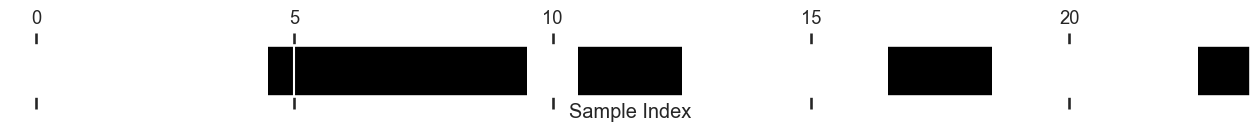

In [232]:
# Review/Plot features selected

maskT = selectT.get_support()
plt.matshow(maskT.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample Index")
plt.yticks(())
plt.show()


In [233]:
# Review Accuracy

X_test_selectedT = selectT.transform(X_testT)

model = RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(X_trainT,y_trainT)
print("Score with all features: {:,.3f}".format(model.score(X_testT,y_testT)))

model.fit(X_train_selectedT,y_trainT)
print("Score with selected features: {:,.3f}".format(model.score(X_test_selectedT,y_testT)))



Score with all features: 1.000
Score with selected features: 1.000


Accuracy Results: 

With features to select=5
Score with all features: 1.000
Score with selected features: 0.685

With features to select=10
Score with all features: 1.000
Score with selected features: 1.000


#### Principal Component Analysis


In [234]:
# Import modules neeeded

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [235]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_trainT = sc.fit_transform(X_trainT)
X_testT = sc.transform(X_testT)

In [236]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_trainT = pca.fit_transform(X_trainT)
X_testT = pca.transform(X_testT)

In [237]:
# explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24837418, 0.17094053, 0.07108438, 0.06368615, 0.04432917,
       0.04293884, 0.04168609, 0.03777499, 0.03634259, 0.03575347,
       0.03144108, 0.03124232, 0.02846836, 0.02443138, 0.02239624,
       0.01963249, 0.0139632 , 0.01077206, 0.01025401, 0.00775433,
       0.00298889, 0.0017311 , 0.0010621 , 0.00095203])

(79.16 % percent of the classification information contained in the feature set is captured by the first 10 principal components)
    

In [238]:
# Using the 10 principal components

# from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_trainT = pca.fit_transform(X_trainT)
X_testT = pca.transform(X_testT)



In [239]:
# explained variance ratio

explained_variance_10 = pca.explained_variance_ratio_
explained_variance_10

array([0.24837418, 0.17094053, 0.07108438, 0.06368615, 0.04432917,
       0.04293884, 0.04168609, 0.03777499, 0.03634259, 0.03575347])

#### Training and Making Predictions

Using Random Forest

In [240]:
# Using Random Forest

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_trainT, y_trainT)

# Predicting the Test set results
y_predT = classifier.predict(X_testT)

In [241]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_testT, y_predT)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_testT, y_predT)))

[[6731  238]
 [1151  880]]
Accuracy: 0.8456666666666667


Tunning number of principal components

In [202]:
# Using the 5 principal components

# from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_trainT = pca.fit_transform(X_trainT)
X_testT = pca.transform(X_testT)


In [203]:
# explained variance ratio

explained_variance_5 = pca.explained_variance_ratio_
explained_variance_5

array([0.41408091, 0.28606268, 0.11893934, 0.10642213, 0.07449493])

In [204]:
# Using Random Forest

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_trainT, y_trainT)

# Predicting the Test set results
y_predT = classifier.predict(X_testT)

In [205]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_testT, y_predT)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_testT, y_predT)))

[[6665  326]
 [1373  636]]
Accuracy: 0.8112222222222222


(The accucary decreases)




Applying algorithms:

Random Forest

In [265]:
# Random Forest

rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)


In [266]:
rfc.fit(X_trainT,y_trainT)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [267]:
# Making predictions

y_predT = rfc.predict(X_testT)


In [269]:
# Confusion matrix

cmrf = confusion_matrix(y_testT, y_predT)
cmrf


array([[6888,   81],
       [  96, 1935]], dtype=int64)

In [270]:
# Obtaining accuracy

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_testT, y_predT)
acc = accuracy_score(y_testT, y_predT)
prec = precision_score(y_testT, y_predT)
rec = recall_score(y_testT, y_predT)
f1 = f1_score(y_testT, y_predT)

resultsRF = pd.DataFrame([['Random Forest Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

resultsRF


Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest Classifier  0.980333   0.959821  0.952733  0.956264  0.970555

In [273]:
# Tuning Parameters (n_estimators and criterion)

rfc2 = RandomForestClassifier(n_estimators = 200,criterion = 'gini',random_state = 0)


In [274]:
rfc2.fit(X_trainT,y_trainT)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [275]:
# Making predictions

y_predT2 = rfc2.predict(X_testT)


In [279]:
# Confusion matrix

cmrf2 = confusion_matrix(y_testT, y_predT2)
cmrf2


array([[6880,   89],
       [  99, 1932]], dtype=int64)

In [304]:
# Obtaining accuracy

roc2=roc_auc_score(y_testT, y_predT2)
acc2 = accuracy_score(y_testT, y_predT2)
prec2 = precision_score(y_testT, y_predT2)
rec2 = recall_score(y_testT, y_predT2)
f1_2 = f1_score(y_testT, y_predT2)

resultsRF2 = pd.DataFrame([['Random Forest Tuned', acc2,prec2,rec2, f1_2,roc2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

resultsRF2


Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest Tuned  0.979111   0.955962  0.951256  0.953603  0.969242

Support Vector Machine

In [281]:
# Support Vector Machine (SVC) Support Vector Classification 

from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)

scv.fit(X_trainT, y_trainT)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [283]:
# Making predictions

y_predTsvm = scv.predict(X_testT)


In [284]:
# Confusion matrix

cmsvm = confusion_matrix(y_testT, y_predTsvm)
cmsvm


array([[6896,   73],
       [ 115, 1916]], dtype=int64)

In [286]:
# Obtaining accuracy

rocsvm = roc_auc_score(y_testT, y_predTsvm)
accsvm = accuracy_score(y_testT, y_predTsvm)
precsvm = precision_score(y_testT, y_predTsvm)
recsvm = recall_score(y_testT, y_predTsvm)
f1svm = f1_score(y_testT, y_predTsvm)

resultssvm = pd.DataFrame([['Support Vector Machine', accsvm,precsvm,recsvm, f1svm,rocsvm]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
resultssvm


Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Support Vector Machine  0.979111   0.963298  0.943378  0.953234  0.966451

In [287]:
# Tuning Parameters (kernel and degree)

scv2 = SVC(kernel = 'poly', degree=5, random_state = 0)

scv2.fit(X_trainT, y_trainT)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [288]:
# Making predictions

y_predTsvm2 = scv2.predict(X_testT)


In [289]:
# Confusion matrix

cmsvm2 = confusion_matrix(y_testT, y_predTsvm2)
cmsvm2


array([[6902,   67],
       [ 297, 1734]], dtype=int64)

In [305]:
# Obtaining accuracy

rocsvm2 = roc_auc_score(y_testT, y_predTsvm2)
accsvm2 = accuracy_score(y_testT, y_predTsvm2)
precsvm2 = precision_score(y_testT, y_predTsvm2)
recsvm2 = recall_score(y_testT, y_predTsvm2)
f1svm2 = f1_score(y_testT, y_predTsvm2)

resultssvm2 = pd.DataFrame([['Support Vector Machine Tuned', accsvm2,precsvm2,recsvm2, f1svm2,rocsvm2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
resultssvm2


Model  Accuracy  Precision    Recall  F1 Score  \
0  Support Vector Machine Tuned  0.959556   0.962798  0.853767   0.90501   

        ROC  
0  0.922076

K-Nearest Neighbour

In [292]:
# KNN (K-Nearest Neighbour)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_trainT,y_trainT)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [296]:
# Making predictions

y_predTknn = knn.predict(X_testT)


In [297]:
# Confusion matrix

cmknn = confusion_matrix(y_testT, y_predTknn)
cmknn


array([[6777,  192],
       [ 213, 1818]], dtype=int64)

In [299]:
# Obtaining accuracy

rocknn = roc_auc_score(y_testT, y_predTknn)
accknn = accuracy_score(y_testT, y_predTknn)
precknn = precision_score(y_testT, y_predTknn)
recknn = recall_score(y_testT, y_predTknn)
f1knn = f1_score(y_testT, y_predTknn)

resultsknn = pd.DataFrame([['K-Nearest Neighbour', accknn,precknn,recknn, f1knn,rocknn]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
resultsknn


Model  Accuracy  Precision    Recall  F1 Score       ROC
0  K-Nearest Neighbour     0.955   0.904478  0.895126  0.899777  0.933787

In [300]:
# Tuning Parameters (n_neighbors and weights)

knn2 = KNeighborsClassifier(n_neighbors=10, weights='distance')

knn2.fit(X_trainT,y_trainT)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [301]:
# Making predictions

y_predTknn2 = knn2.predict(X_testT)


In [302]:
# Confusion matrix

cmknn2 = confusion_matrix(y_testT, y_predTknn2)
cmknn2


array([[6793,  176],
       [ 215, 1816]], dtype=int64)

In [306]:
# Obtaining accuracy

rocknn2 = roc_auc_score(y_testT, y_predTknn2)
accknn2 = accuracy_score(y_testT, y_predTknn2)
precknn2 = precision_score(y_testT, y_predTknn2)
recknn2 = recall_score(y_testT, y_predTknn2)
f1knn2 = f1_score(y_testT, y_predTknn2)

resultsknn2 = pd.DataFrame([['K-Nearest Neighbour Tuned', accknn2,precknn2,recknn2, f1knn2,rocknn2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
resultsknn2


Model  Accuracy  Precision    Recall  F1 Score  \
0  K-Nearest Neighbour Tuned  0.956556   0.911647  0.894141  0.902809   

        ROC  
0  0.934443

#### Model Evaluation


In [307]:
# Model Results

# Models that perfrom better

# Random Forest
model_results =  pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

# Support Vector Classification
model_results = model_results.append(resultssvm, ignore_index = True)

# K-Nearest Neighbour Tuned
model_results = model_results.append(resultsknn2, ignore_index = True)

# Results
model_results


Model  Accuracy  Precision    Recall  F1 Score  \
0              Random Forest  0.980333   0.959821  0.952733  0.956264   
1     Support Vector Machine  0.979111   0.963298  0.943378  0.953234   
2  K-Nearest Neighbour Tuned  0.956556   0.911647  0.894141  0.902809   

        ROC  
0  0.970555  
1  0.966451  
2  0.934443

It is important to evaluate the models base on these metrics. For our case we case we may provide a particular attention to the Accuracy, Precision and Recall
